# CSCI 632 Lecture 16 GDA and Naive Bayes again.

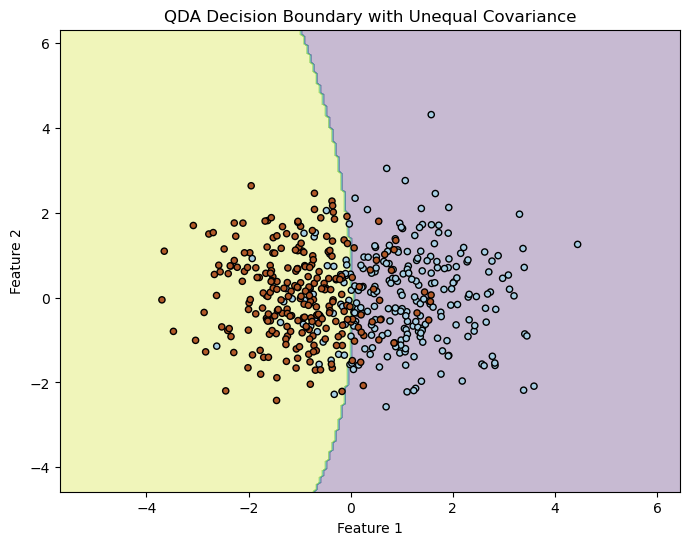

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Function to generate Gaussian distributed data with unequal covariance
def generate_data(mean1, cov1, mean2, cov2, n_samples=100):
    np.random.seed(42)
    X1 = np.random.multivariate_normal(mean1, cov1, n_samples)
    X2 = np.random.multivariate_normal(mean2, cov2, n_samples)
    y1 = np.zeros(n_samples)
    y2 = np.ones(n_samples)
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    return X, y


def plot_QDA(X, y):
    # Fit a QDA model
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X, y)
    
    # Plot decision boundary
    def plot_decision_boundary(clf, X, y):
        x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
        y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.Paired)
        plt.title('QDA Decision Boundary with Unequal Covariance')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    
    # Plot the data and decision boundary
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(qda, X, y)
    plt.show()

# Slightly different variances
mean1 = [1, 0]
cov1 = [[1.25, 0], [0, 1.25]]
mean2 = [-1, 0]
cov2 = [[1, 0], [0, 1]]
X, y = generate_data(mean1, cov1, mean2, cov2, n_samples=250)
plot_QDA(X, y)


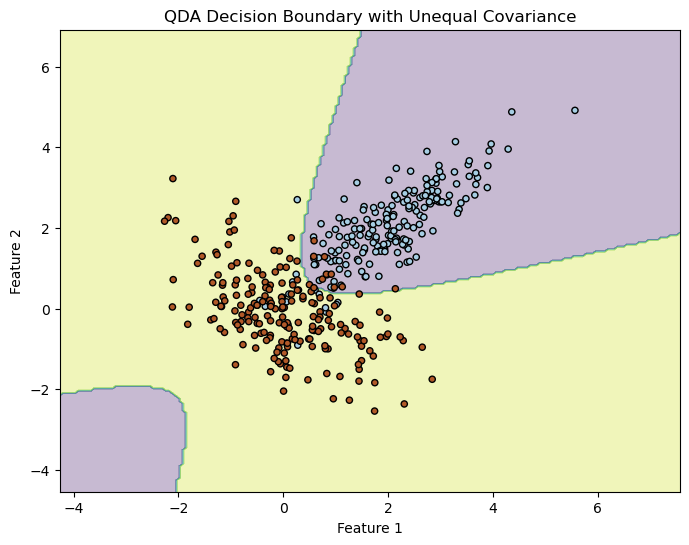

In [48]:
# Very different variances
mean1 = [2, 2]
cov1 = [[1.1, 0.9], [0.9, 1.1]]
mean2 = [0, 0]
cov2 = [[1, -0.5], [-0.5, 1]]
X, y = generate_data(mean1, cov1, mean2, cov2, n_samples=200)
plot_QDA(X, y)

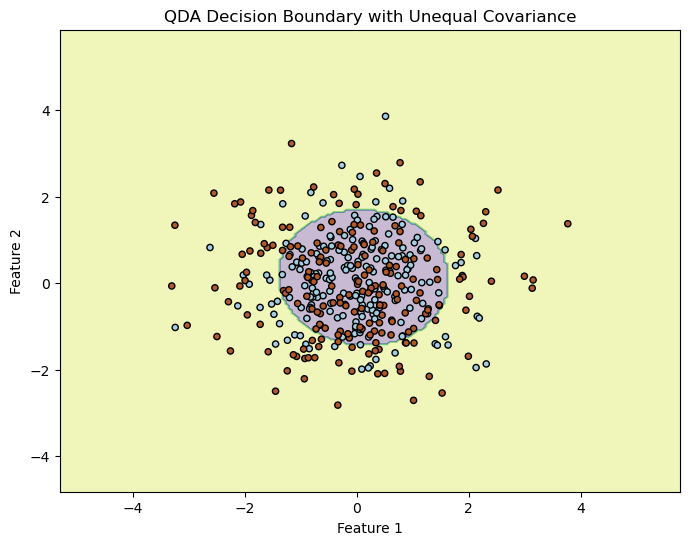

In [49]:
# equal means.
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [0, 0]
cov2 = [[1.5, 0], [0, 1.5]]
X, y = generate_data(mean1, cov1, mean2, cov2, n_samples=200)
plot_QDA(X, y)

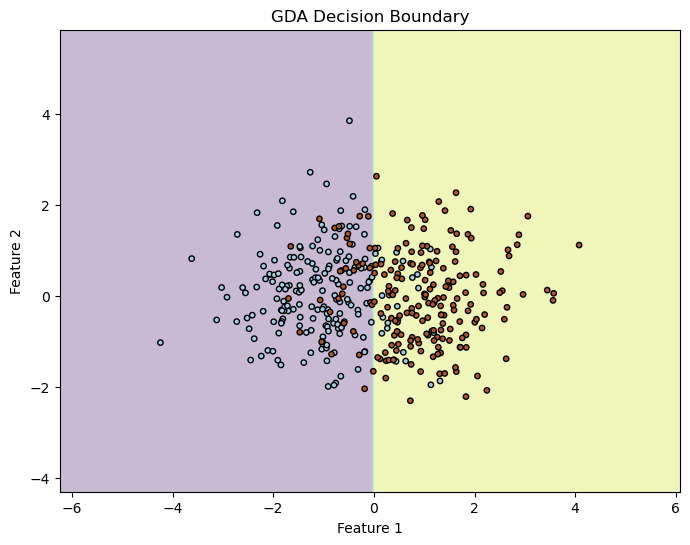

In [50]:
import numpy as np
from scipy.stats import multivariate_normal

class GDA:
    def __init__(self):
        self.phi = None  # class prior probabilities
        self.mu_0 = None  # mean of class 0
        self.mu_1 = None  # mean of class 1
        self.sigma = None  # shared covariance matrix
    
    def fit(self, X, y):
        """
        Fit GDA model to data X with labels y.
        X: numpy array of shape (m, n) where m is number of samples and n is number of features.
        y: numpy array of shape (m,) containing labels 0 or 1.
        """
        m, n = X.shape
        
        # Separate data by class
        X_0 = X[y == 0]
        X_1 = X[y == 1]
        
        # Estimate class priors
        self.phi = np.mean(y)
        
        # Estimate means
        self.mu_0 = np.mean(X_0, axis=0)
        self.mu_1 = np.mean(X_1, axis=0)
        
        # Shared covariance (LDA assumption)
        self.sigma = (np.dot((X_0 - self.mu_0).T, (X_0 - self.mu_0)) +
                      np.dot((X_1 - self.mu_1).T, (X_1 - self.mu_1))) / m
    
    def predict(self, X):
        """
        Predict the class labels for input X.
        X: numpy array of shape (m, n).
        Returns: numpy array of predicted class labels (0 or 1).
        """
        # Invert shared covariance matrix
        inv_sigma = np.linalg.inv(self.sigma)
        
        def linear_decision_boundary(x):
            return (np.dot(np.dot(x, inv_sigma), self.mu_1 - self.mu_0) - 
                    0.5 * np.dot(np.dot(self.mu_1.T, inv_sigma), self.mu_1) + 
                    0.5 * np.dot(np.dot(self.mu_0.T, inv_sigma), self.mu_0) +
                        np.log(self.phi / (1 - self.phi)))
            
        scores = np.apply_along_axis(linear_decision_boundary, 1, X)
        
        # Convert scores to predicted labels (threshold at 0)
        return (scores > 0).astype(int)

def plot_GDA(X, y):
    gda = GDA()
    gda.fit(X, y)
    
    # Plot decision boundary
    def plot_decision_boundary(clf, X, y):
        x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
        y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=15, edgecolor='k', cmap=plt.cm.Paired)
        plt.title('GDA Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    
    # Plot the data and decision boundary
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(gda, X, y)
    plt.show()


# equal covariance matrices.
mean1 = [-1, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [1, 0]
cov2 =  cov1
X, y = generate_data(mean1, cov1, mean2, cov2, n_samples=200)
plot_GDA(X, y)

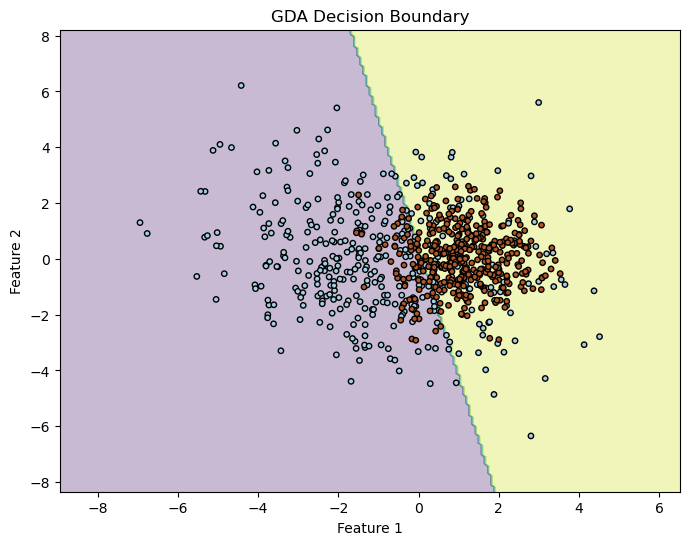

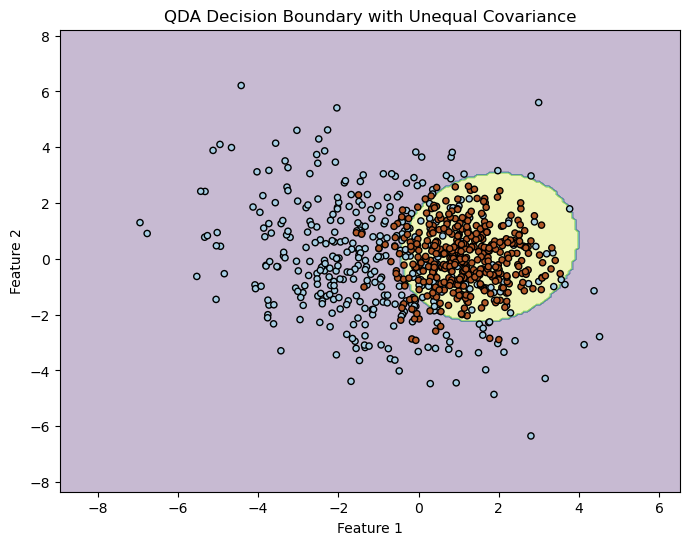

In [53]:
# GDA using shared covariance matrix even though underlying covariances are differen.t
mean1 = [-1, 0]
cov1 = [[4, -.9], [-.9, 4]]
mean2 = [1, 0]
cov2 = [[1, 0], [0, 1]]
X, y = generate_data(mean1, cov1, mean2, cov2, n_samples=400)
plot_GDA(X, y)
plot_QDA(X, y)

## Logistic Regression

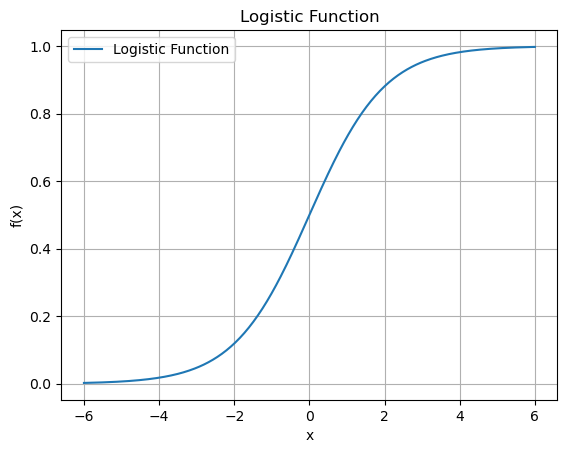

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Generate values for x
x = np.linspace(-6, 6 , 400)

# Apply the logistic function to x
y = logistic(x)

# Plot the logistic function
plt.plot(x, y, label="Logistic Function")
plt.title("Logistic Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()